# Домашнее задание 3

1) [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

1) [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

2) [3 балла] Реализуйте приведение изображения листка к "виду сверху"

3) [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

4) [3 балла] Доп. задача 1: Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

5) [5 баллов] Доп. задача 2: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

In [3]:
!git clone -b develop https://github.com/haminhtien99/cvr_course

Cloning into 'cvr_course'...
remote: Enumerating objects: 524, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 524 (delta 16), reused 8 (delta 2), pack-reused 491
Receiving objects: 100% (524/524), 66.45 MiB | 35.31 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [4]:
cd cvr_course/notebooks


/content/cvr_course/notebooks/cvr_course/notebooks


Реализуйте нахождение расстояния от камеры до листка

In [5]:
import numpy as np
import cv2
import time
import os
import math
import sys
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

def find_contour (img, low_th, high_th):
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    
    mask = cv2.inRange (img, low_th, high_th)
    
    contours, hierarchy = cv2.findContours (mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours [0]

    approx = cv2.convexHull (cnt)

    epsilon = 0.05 * cv2.arcLength (approx, True)
    approx = cv2.approxPolyDP (approx, epsilon, True)

    return approx

In [6]:
def find_distance (img):
    low_th  = (200, 200, 200)
    high_th = (255, 255, 255)

    contour = find_contour (img, low_th, high_th)
    
    length = cv2.arcLength (contour, True)
    
    print (contour)

    distance = 180.0 * 364 / length
    
    return distance

In [13]:
img = cv2.imread('../data/imgs/arrow/vlcsnap-2020-10-21-18h01m22s212.png')
#img = cv2.imread('../data/imgs/perimeter/vlcsnap-2020-10-21-01h21m44s087.png')
#img = cv2.imread('../data/imgs/perimeter/vlcsnap-2020-10-21-01h21m50s155.png')
#img = cv2.imread('../data/imgs/perimeter/vlcsnap-2020-10-21-01h21m55s352.png')


In [14]:
low_th  = (200, 200, 200)
high_th = (255, 255, 255)

contour = find_contour (img, low_th, high_th)

In [25]:
print(contour)

[[[222 400]]]



Реализуйте приведение изображения листка к "виду сверху"

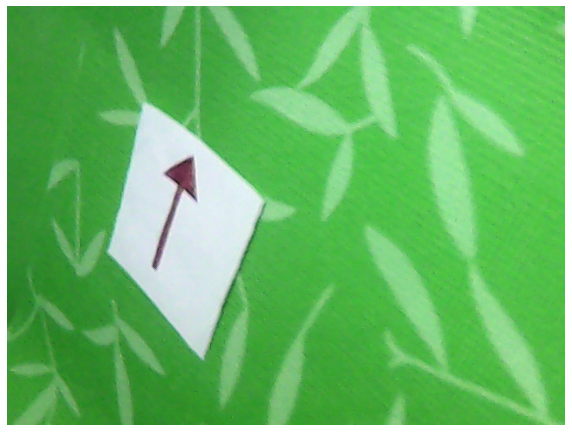

In [17]:
img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m22s212.png", cv2.IMREAD_COLOR)
plt.imshow (img)
plt.axis ('off')
plt.show ()

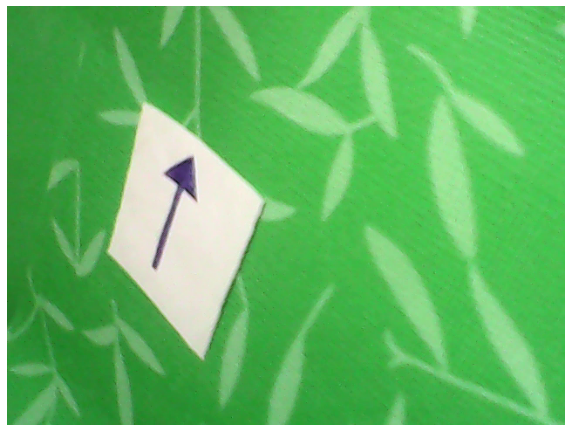

In [27]:
img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

plt.imshow (img_rgb)
plt.axis ('off')
plt.show ()

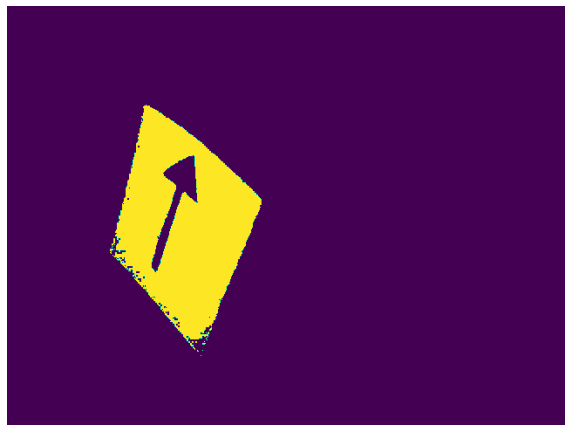

In [19]:
low_th  = (200, 200, 200)
high_th = (255, 255, 255)

mask = cv2.inRange (img, low_th, high_th)

plt.imshow (mask)
plt.axis ('off')
plt.show ()

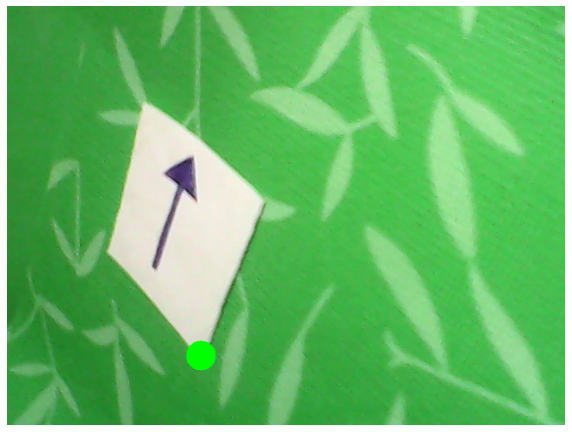

In [24]:
contours, hierarchy = cv2.findContours (mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours [0]

approx = cv2.convexHull (cnt)

epsilon = 0.1 * cv2.arcLength (approx, True)

approx = cv2.approxPolyDP (approx, epsilon, True)

contour_marked = cv2.drawContours (img_rgb, approx, -1, (0, 255, 0), 10)

plt.imshow (contour_marked)
plt.axis ('off')
plt.show ()

In [21]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype="float32")
    
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    # return the ordered coordinates
    return rect